Import library yang ada di python untuk diimplementasikan di program.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import matplotlib as mpl; mpl.rcParams['figure.dpi'] = 100
import seaborn as sns; sns.set()
import random

### **Data Exploration**

Membaca file csv yang akan diolah dengan library pandas. Pembacaan data untuk model 1 dan 2 dipisah karena pengolahannya juga akan berbeda.

In [0]:
#membaca data csv untuk model 1
data = pd.read_csv("air_bnb.csv")
#data

Sebelum mengambil dua atribut yang akan dicluster maka lihat dahulu nilai korelasi antar atribut pada data csv.

<Figure size 10000x10000 with 0 Axes>

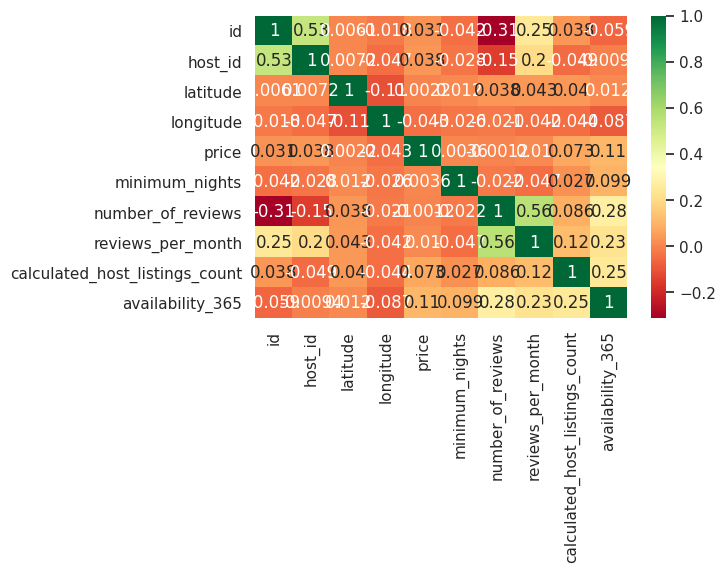

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

dt_cor = data.corr()
top_corr_features = dt_cor.index
plt.figure(figsize=(100,100))
plt.show()
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### **Data Exploration**

Membersihkan data yang kosong sebelum diolah atau diclustering.

In [0]:
#eksplorasi 1 untuk model 1  menghapus data NaN (kosong)
dataset = DataFrame.dropna(data)
#print(dataset)

Pada grafik di atas, terlihat bahwa nilai korelasi yang tertinggi adalah antara atribut 'number_of_reviews' dan atribut 'reviews_per_month' oleh karena itu dipilih dua atribut tersebut.

In [69]:
#mengambil dua atribut dan masukkan ke sebuah variable untuk model 1

usecol = dataset[['number_of_reviews', 'reviews_per_month']]
usecol

,number_of_reviews,reviews_per_month
0,118,3.76
1,6,1.42
2,143,1.25
3,25,0.39
4,197,1.75
...,...,...
22449,1,1.00
22463,5,5.00
22475,1,1.00
22508,1,1.00


In [70]:
#untuk model 2 memiliki variable yang berbeda dari model 1
#karena pengolahannya nanti akan berbeda, dan atribut yang berbeda

usecol2 = dataset[['latitude', 'longitude']]
usecol2

,latitude,longitude
0,52.534537,13.402557
1,52.548513,13.404553
2,52.534996,13.417579
3,52.498855,13.349065
4,52.543157,13.415091
...,...,...
22449,52.502952,13.490870
22463,52.457982,13.526945
22475,52.507884,13.467071
22508,52.552250,13.410904


Karena nilai pada setiap atribut pada model 1 maupun 2 ada yang memungkinkan jauh dari nilai rata-rata (outlier) maka dicek apakah keberadaan outlier ada atau tidak dengan memvisualisasikan data menjadi bentuk boxplot.

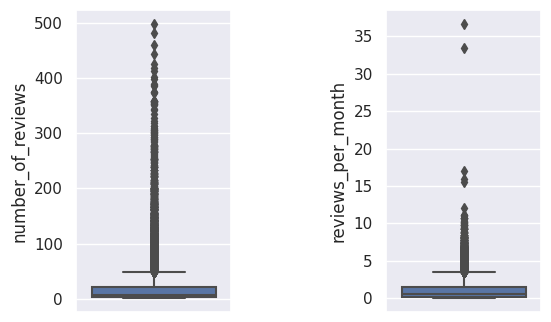

In [71]:
#mengecek keberadaan outlier pada model 1
f, axes = plt.subplots(1, 2)
sns.boxplot(y = usecol['number_of_reviews'], ax = axes[0])
sns.boxplot(y = usecol['reviews_per_month'], ax = axes[1])
plt.subplots_adjust(wspace=1)

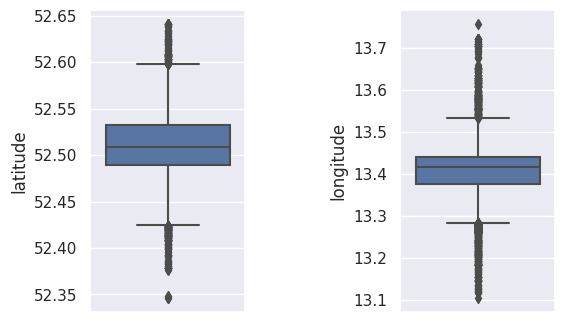

In [72]:
#mengecek keberadaan outlier pada model 1
f, axes = plt.subplots(1, 2)
sns.boxplot(y = usecol2['latitude'], ax = axes[0])
sns.boxplot(y = usecol2['longitude'], ax = axes[1])
plt.subplots_adjust(wspace=1)

Setelah dilihat ternyata data memiliki nilai outlier baik model 1 maupun 2, sebelum outlier diolah nilai data terlebih dahulu dinormalisasi agar range nilai dari tiap atribut setara. Normalisasi/scaling menggunakan MinMaxScaler.

In [73]:
#eksplorasi 2. scaling data model 1 menjadi range 0 sampai 1 agar menghindari outlier

scaler = MinMaxScaler()
dt_scaled = scaler.fit_transform(usecol)
col_new = ['number_of_reviews','reviews_per_month']

dtfin = pd.DataFrame(dt_scaled,columns=col_new)

dtfin
print(max(dtfin['number_of_reviews']))
print(min(dtfin['number_of_reviews']))
print(max(dtfin['reviews_per_month']))
print(min(dtfin['reviews_per_month']))

1.0000000000000002
0.0
1.0
0.0


In [74]:
#eksplorasi 2. scaling data model 2 menjadi range 0 sampai 1 agar menghindari outlier

scaler = MinMaxScaler()
dt_scaled = scaler.fit_transform(usecol2)
col_new = ['latitude','longitude']

dtfin2 = pd.DataFrame(dt_scaled,columns=col_new)

dtfin2
print(max(dtfin2['latitude']))
print(min(dtfin2['latitude']))
print(max(dtfin2['longitude']))
print(min(dtfin2['longitude']))

1.0
0.0
1.0
0.0


Setelah data dinormalisasi, outlier yang tadi terlihat dicari nilainya lalu dihapus/didrop.

In [75]:
#penentuan batas atas dan batas bawah tiap atribut
print(dtfin['number_of_reviews'].quantile(0.10))
print(dtfin['number_of_reviews'].quantile(0.90))
print(dtfin['reviews_per_month'].quantile(0.10))
print(dtfin['reviews_per_month'].quantile(0.90))

#mencari nilai yang ada diluar batas atas maupun batas bawah
index = dtfin[(dtfin['number_of_reviews'] >= (dtfin['number_of_reviews'].quantile(0.90)))|(dtfin['number_of_reviews'] <= (dtfin['number_of_reviews'].quantile(0.10)))|(dtfin['reviews_per_month'] >= (dtfin['reviews_per_month'].quantile(0.90)))|(dtfin['reviews_per_month'] <= (dtfin['reviews_per_month'].quantile(0.10)))].index

#drop nilai outlier yang sudah ditemukan
dtfin.drop(index, inplace=True)
#dtfin

0.0
0.11670020120724348
0.001636661211129296
0.08385160938352468


In [76]:
#penentuan batas atas dan batas bawah tiap atribut
print(dtfin2['latitude'].quantile(0.10))
print(dtfin2['longitude'].quantile(0.90))
print(dtfin2['latitude'].quantile(0.10))
print(dtfin2['longitude'].quantile(0.90))

#mencari nilai yang ada diluar batas atas maupun batas bawah
index = dtfin2[(dtfin2['latitude'] >= (dtfin2['latitude'].quantile(0.90)))|(dtfin2['latitude'] <= (dtfin2['latitude'].quantile(0.10)))|(dtfin2['longitude'] >= (dtfin2['longitude'].quantile(0.90)))|(dtfin2['longitude'] <= (dtfin2['longitude'].quantile(0.10)))].index

#drop nilai outlier yang sudah ditemukan
dtfin2.drop(index, inplace=True)
#dtfin2

0.4327217009279707
0.5480598648565987
0.4327217009279707
0.5480598648565987


Setelah nilai outlier dihapus, agar data lebih bersih dan ringkas maka hapus juga data yang duplikat.

In [77]:
#drop data yg duplikat lalu sesuaikan indexnya
dtfin = dtfin.drop_duplicates().reset_index(drop=True)
dtfin

,number_of_reviews,reviews_per_month
0,0.010060,0.038462
1,0.048290,0.010366
2,0.010060,0.003819
3,0.044266,0.006001
4,0.094567,0.012548
...,...,...
4452,0.002012,0.045281
4453,0.006036,0.079651
4454,0.004024,0.074195
4455,0.004024,0.069831


In [78]:
#drop data yg duplikat lalu sesuaikan indexnya
dtfin2 = dtfin2.drop_duplicates().reset_index(drop=True)
dtfin2

,latitude,longitude
0,0.638272,0.457127
1,0.685535,0.460179
2,0.639823,0.480093
3,0.517599,0.375345
4,0.667423,0.476290
...,...,...
12027,0.518434,0.434743
12028,0.591588,0.438915
12029,0.530854,0.428062
12030,0.491825,0.355402


## **Data Visualization**

Setelah data bersih, maka data divisualisasikan untuk melihat persebarannya.

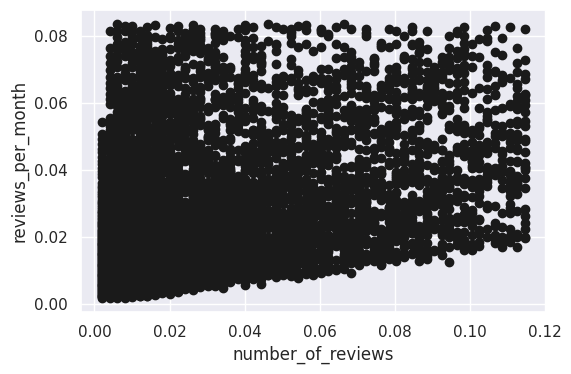

In [79]:
#mengecek persebaran data
plt.scatter(dtfin['number_of_reviews'], dtfin['reviews_per_month'], color = 'k')
plt.xlabel('number_of_reviews')
plt.ylabel('reviews_per_month')
plt.show()

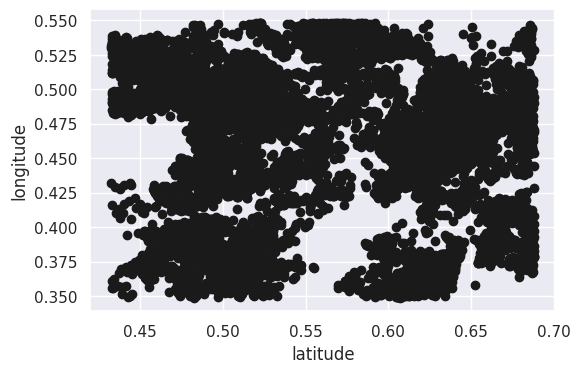

In [0]:
#mengecek persebaran data
plt.scatter(dtfin2['latitude'], dtfin2['longitude'], color = 'k')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

Terlihat data sudah tersebar luas ke seluruh penjuru.

## **Data Clustering**

Sebelum masuk ke clustering, dikarenakan klusterisasi menggunakan metode K-Means maka dicari terlebih dahulu nilai K nya menggunakan elbow method.

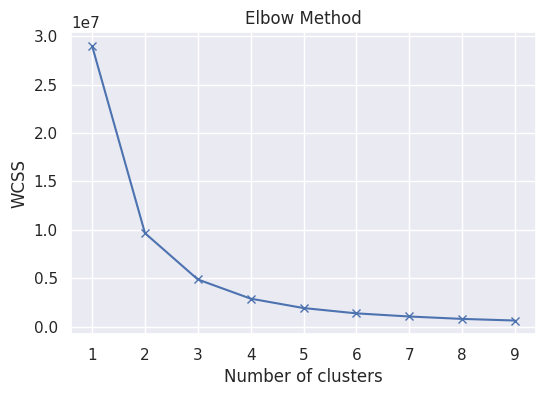

In [80]:
#elbow method untuk mencari nilai K untuk K-means
from sklearn.cluster import KMeans #hanya digunakan untuk elbow method

wcss = []

for i in range(1, 10):
    kmeans = (
        KMeans(n_clusters=i, init='k-means++', 
               max_iter=100, n_init=10, random_state=0)
    )
    kmeans.fit(usecol)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, '-bx')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Dapat dilihat dari grafik bahwa didapatkan nilai K untuk model 1 yaitu 3.

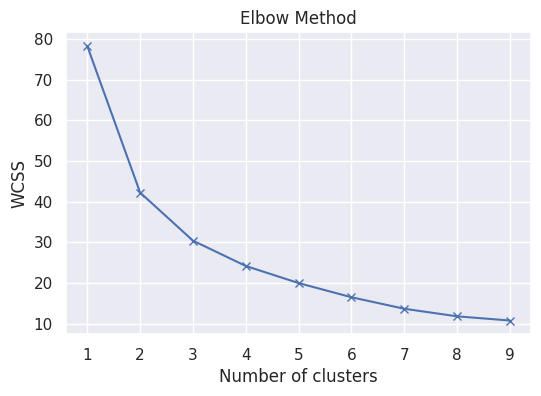

In [81]:
#elbow method untuk mencari nilai K untuk K-means
from sklearn.cluster import KMeans #hanya digunakan untuk elbow method

wcss = []

for i in range(1, 10):
    kmeans = (
        KMeans(n_clusters=i, init='k-means++', 
               max_iter=100, n_init=10, random_state=0)
    )
    kmeans.fit(usecol2)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, '-bx')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Dapat dilihat dari grafik bahwa didapatkan nilai K untuk model 2 yaitu 2.

# K-Means Clustering

Pertama-tama dicari terlebih dahulu titik centroidnya dengan random.

In [0]:
#Random titik untuk centroid pada model 1

import random

def titik_centroids(dtfin):
    k = 3   #from elbow method, the best k is 3
    centroids = {
        i + 1 : [random.choices(dtfin['number_of_reviews']),random.choices(dtfin['reviews_per_month'])]
        for i in range(k)
    }
    return centroids


In [0]:
#Random titik untuk centroid pada model 2

import random

def titik_centroids2(dtfin2):
    k2 = 2   #from elbow method, the best k is 2
    centroids2 = {
        i + 1 : [random.choices(dtfin2['latitude']),random.choices(dtfin2['longitude'])]
        for i in range(k2)
    }
    return centroids2


Setelah didapatkan nilai centroid pada variabel centroids, dilakukan plottingan centroid ke dalam grafik.

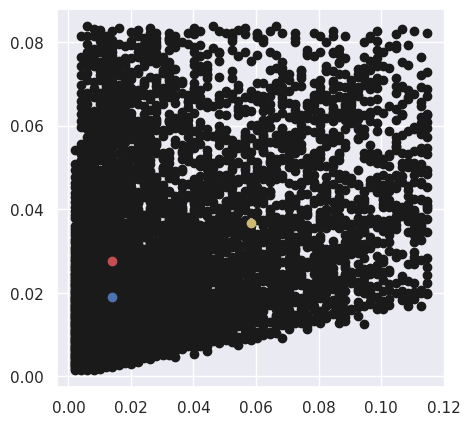

In [0]:
#Plot Centroids untuk model 1

centroids = titik_centroids(dtfin)
fig = plt.figure(figsize=(5, 5))
plt.scatter(dtfin['number_of_reviews'], dtfin['reviews_per_month'], color='k')
colmap = {1: 'y', 2: 'r', 3: 'b'}
for i in centroids:
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

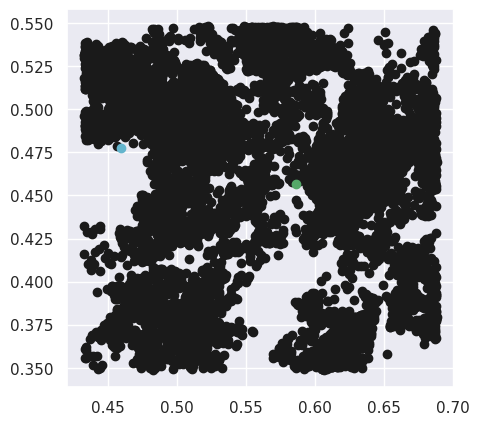

In [0]:
#Plot Centroids untuk model 2

centroids2 = titik_centroids2(dtfin2)
fig = plt.figure(figsize=(5, 5))
plt.scatter(dtfin2['latitude'], dtfin2['longitude'], color='k')
colmap2 = {1: 'g', 2: 'c'}
for i in centroids2:
    plt.scatter(*centroids2[i], color=colmap2[i])
plt.show()

Dapat dilihat bahwa titik centroids sudah ditempatkan pada posisinya masing-masing. Setelah itu baru pelabelan data sesuai dengan titik centroids yang terdekat dengan titik data tersebut.

In [0]:
#Assignment stage untuk model 1

def assignment(dtfin, centroids):
  for i in centroids.keys():
    dtfin['distance_from_{}'.format(i)] = (
        np.sqrt(
            (dtfin['number_of_reviews'] - centroids[i][0]) ** 2
            + (dtfin['reviews_per_month'] - centroids[i][1]) ** 2
        )
    )
  centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
  dtfin['closest'] = dtfin.loc[:, centroids_distance_cols].idxmin(axis=1)
  dtfin['closest'] = dtfin['closest'].map(lambda x: int(x.lstrip('distance_from_')))
  dtfin['color'] = dtfin['closest'].map(lambda x: colmap[x])
  return dtfin

dtfin = assignment(dtfin, centroids)
print(dtfin.head())

   number_of_reviews  reviews_per_month  ...  closest  color
0           0.010060           0.038462  ...        2      r
1           0.048290           0.010366  ...        1      y
2           0.010060           0.003819  ...        3      b
3           0.044266           0.006001  ...        3      b
4           0.094567           0.012548  ...        1      y

[5 rows x 7 columns]


In [0]:
#Assignment stage untuk model 2

def assignment2(dtfin2, centroids2):
  for i in centroids2.keys():
    dtfin2['distance_from_{}'.format(i)] = (
        np.sqrt(
            (dtfin2['latitude'] - centroids2[i][0]) ** 2
            + (dtfin2['longitude'] - centroids2[i][1]) ** 2
        )
    )
  centroids_distance_cols2 = ['distance_from_{}'.format(i) for i in centroids2.keys()]
  dtfin2['closest'] = dtfin2.loc[:, centroids_distance_cols2].idxmin(axis=1)
  dtfin2['closest'] = dtfin2['closest'].map(lambda x: int(x.lstrip('distance_from_')))
  dtfin2['color'] = dtfin2['closest'].map(lambda x: colmap2[x])
  return dtfin2

dtfin2 = assignment2(dtfin2, centroids2)
print(dtfin2.head())

   latitude  longitude  distance_from_1  distance_from_2  closest color
0  0.638272   0.457127         0.052129         0.180245        1     g
1  0.685535   0.460179         0.099459         0.227018        1     g
2  0.639823   0.480093         0.058668         0.180670        1     g
3  0.517599   0.375345         0.106164         0.117617        1     g
4  0.667423   0.476290         0.083671         0.208253        1     g


Setelah pelabelan setiap data, data yang sudah berlabel diplot menjadi bentuk grafik dan berwarna sesuai dengan label klusternya.

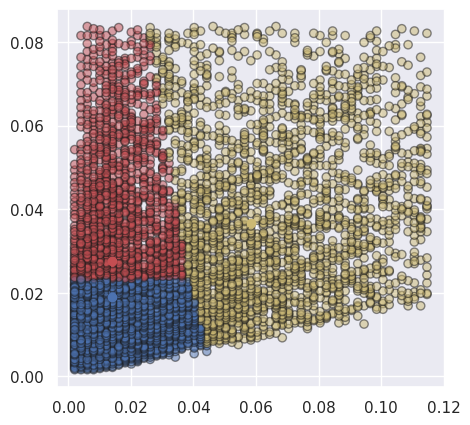

In [0]:
#plot assignment stage untuk model 1

fig = plt.figure(figsize=(5, 5))
plt.scatter(dtfin['number_of_reviews'], dtfin['reviews_per_month'], color=dtfin['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.show()

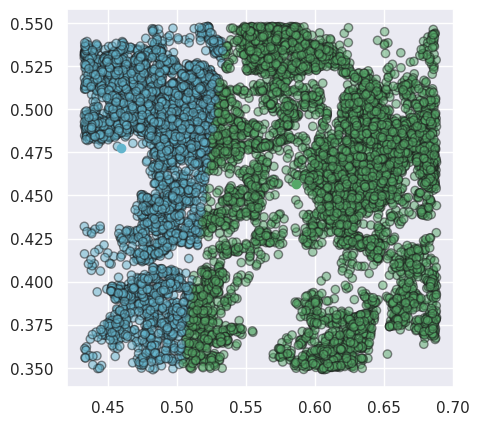

In [0]:
#plot assignment stage untuk model 1

fig = plt.figure(figsize=(5, 5))
plt.scatter(dtfin2['latitude'], dtfin2['longitude'], color=dtfin2['color'], alpha=0.5, edgecolor='k')
for i in centroids2.keys():
  plt.scatter(*centroids2[i], color=colmap2[i])
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.show()

Setelah datanya diplot ke kluster masing-masing dilakukan update centroids untuk mencari titik baru yang berada di tengah-tengah data.

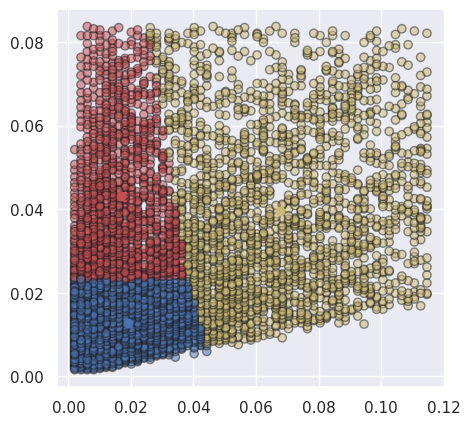

In [0]:
#update centroids untuk model 1

import copy
old_centroids = copy.deepcopy(centroids)

def update(k):
  for i in centroids.keys():
    centroids[i][0] = np.mean(dtfin[dtfin['closest'] == i]['number_of_reviews'])
    centroids[i][1] = np.mean(dtfin[dtfin['closest'] == i]['reviews_per_month'])
  return k

centroids = update(centroids)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(dtfin['number_of_reviews'], dtfin['reviews_per_month'], color=dtfin['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.show()


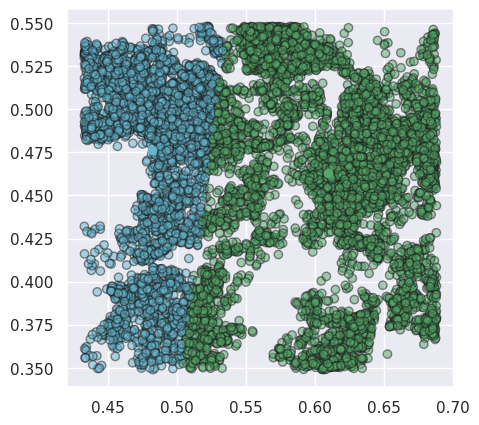

In [0]:
#update centroids untuk model 2

import copy
old_centroids2 = copy.deepcopy(centroids2)

def update2(k2):
  for i in centroids2.keys():
    centroids2[i][0] = np.mean(dtfin2[dtfin2['closest'] == i]['latitude'])
    centroids2[i][1] = np.mean(dtfin2[dtfin2['closest'] == i]['longitude'])
  return k2

centroids2 = update2(centroids2)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(dtfin2['latitude'], dtfin2['longitude'], color=dtfin2['color'], alpha=0.5, edgecolor='k')
for i in centroids2.keys():
  plt.scatter(*centroids2[i], color=colmap2[i])
plt.show()


Setelah didapatkan titiknya, data mulai diplot sesuai centroid terdekatnya dan dibuat grafiknya.

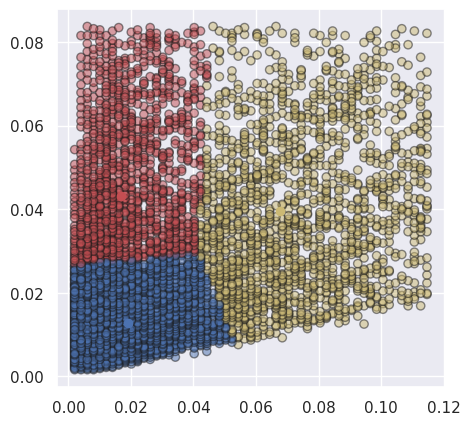

In [0]:
#Repeat Assignment stage untuk model 1
dtfin = assignment(dtfin, centroids)

fig = plt.figure(figsize=(5, 5))
plt.scatter(dtfin['number_of_reviews'], dtfin['reviews_per_month'], color=dtfin['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.show()

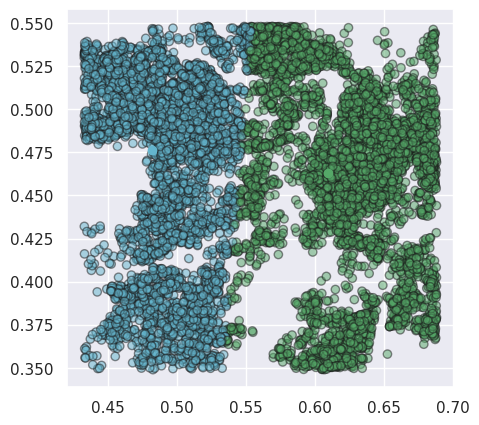

In [0]:
#Repeat Assignment stage untuk model 2
dtfin2 = assignment2(dtfin2, centroids2)

fig = plt.figure(figsize=(5, 5))
plt.scatter(dtfin2['latitude'], dtfin2['longitude'], color=dtfin2['color'], alpha=0.5, edgecolor='k')
for i in centroids2.keys():
  plt.scatter(*centroids2[i], color=colmap2[i])
plt.show()

Setelah itu centroids harus diupdate terus sampai menemukan titik centroids yang pas dan tidak akan berubah lagi.

iterasi ke: 13


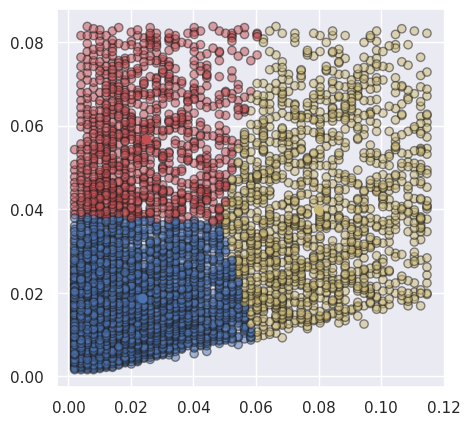

In [0]:
#Perulangan sampai centroids tidak berubah lagi
# i = 0

while True:
    i += 1
    closest_centroids = dtfin['closest'].copy(deep=True)
    centroids = update(centroids)
    dtfin = assignment(dtfin, centroids)
    if closest_centroids.equals(dtfin['closest']):
    #      i += 1
    # else:
    #      i = 0
    
    # if i == 5:
      break
    
print('iterasi ke: ' +str(i))

#Plot terakhir setelah centroid tidak berubah
fig = plt.figure(figsize=(5, 5))
plt.scatter(dtfin['number_of_reviews'], dtfin['reviews_per_month'], color=dtfin['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.show()

Dapat dilihat bahwa untuk model 1 pada iterasi ke-20 titik centroids sudah berada pada tempat yang pas dan tidak akan berubah lagi.

iterasi ke: 15


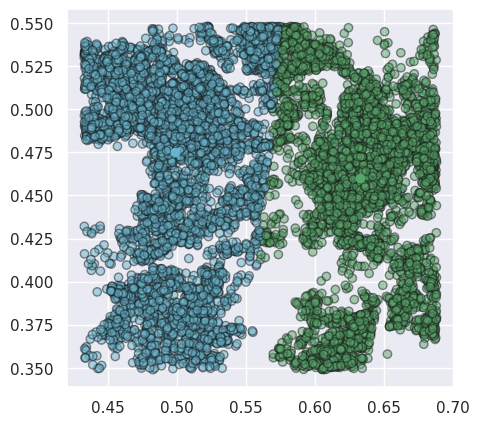

In [0]:
#Perulangan sampai centroids tidak berubah lagi
# i = 0

while True:
    i += 1
    closest_centroids2 = dtfin2['closest'].copy(deep=True)
    centroids2 = update2(centroids2)
    dtfin2 = assignment2(dtfin2, centroids2)
    if closest_centroids2.equals(dtfin2['closest']):
    #      i += 1
    # else:
    #      i = 0
    
    # if i == 5:
      break
    
print('iterasi ke: ' +str(i))

#Plot terakhir setelah centroid tidak berubah
fig = plt.figure(figsize=(5, 5))
plt.scatter(dtfin2['latitude'], dtfin2['longitude'], color=dtfin2['color'], alpha=0.5, edgecolor='k')
for i in centroids2.keys():
  plt.scatter(*centroids2[i], color=colmap2[i])
plt.show()

## **Evaluation**

Karena nilai K sudah diketahui dengan metode elbow maka untuk evaluasi kita menggunakan SSE (Sum of Square Error) untuk mengetahui nilai error terkecil.

In [0]:
#evaluasi untuk model pertama dengan k = 3
print('Nilai error untuk model 1 dengan k=3 :', wcss[2])

#evaluasi untuk model pertama dengan k = 3
print('Nilai error untuk model 2 dengan k=2 :', wcss[1])

Nilai error untuk model 1 dengan k=3 : 30.416480199827504
Nilai error untuk model 2 dengan k=2 : 42.23605739628387


## **FEATURE ENGINEERING**

Sebelum data diklasifikasikan, data harus diolah terlebih dahulu. Pertama ambil data yang akan dijadikan feature (data X) dan ambil data yang akan dijadikan sebagai target (data y).

In [0]:
#proses pengelompokan data
X = dataset[['price','number_of_reviews','availability_365']]
y = dataset['room_type']
print(X.shape)
print(y.shape)

(18587, 3)
(18587,)


In [0]:
#cek isi data X
X.head()

Karena data target merupakan string, maka ubah terlebih dahulu ke dalam bentuk integer (encode)

In [0]:
#proses encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = pd.Series(le.fit_transform(y),name='room_type')
y

0        0
1        1
2        0
3        1
4        1
        ..
18582    1
18583    0
18584    1
18585    0
18586    0
Name: room_type, Length: 18587, dtype: int64

Setelah itu, gabungkan data yang menjadi feature dengan data target yang sudah diencoding.

In [0]:
#penggabungan menjadi satu data csv
gabung = X.join(y)
gabung.to_csv('gabung.csv')
gabung.head()

,price,number_of_reviews,availability_365,room_type
0,60,118,141,0.0
1,17,6,0,1.0
2,90,143,220,0.0
3,26,25,297,1.0
4,42,197,26,1.0


## **KLASIFIKASI**

Sebelum dimulainya proses klasifikasi, terlebih dahulu data harus displit menjadi data latih dan data uji.

In [0]:
#proses split data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) #ukuran data latih 30% dari keseluruhan
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# print(X_train)
# print(y_train)
# print(X_test)
# print(y_test)

(13010, 3)
(13010,)
(5577, 3)
(5577,)


Sebelum masuk ke proses klasifikasi, dilakukan pengimportan library dari masing-masing metode klasifikasi untuk model 1 maupun model 2.

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split as tr
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as pr
from sklearn.metrics import recall_score as rec

# Model 1. Menggunakan metode klasifikasi Naive Bayes

Untuk model pertama, dilakukan proses pengklasifikasian dengan metode Naive Bayes.

In [0]:
#Memanggil fungsi gaussian classifier 
naive = GaussianNB()

#Train data menggunakan data latih
naive.fit(X_train, y_train)

#Prediksi output untuk data uji
predict = naive.predict(X_test)
print("Prediksi Kelas\n")
i= 0
for i in range(len(predict)):
    print(predict[i])
    i += 1
print(i)

Streaming output truncated to the last 5000 lines.
0
0
1
0
0
0
1
1
0
1
0
1
1
1
1
1
0
0
0
1
0
1
1
0
0
0
1
0
0
0
0
0
1
1
1
0
1
0
0
1
1
0
1
1
0
0
0
0
0
1
1
1
0
1
0
0
0
0
1
0
0
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
1
0
0
0
0
1
0
1
1
0
1
0
0
1
1
0
1
1
0
0
1
0
0
0
1
1
0
0
1
0
1
0
0
1
1
0
0
0
0
1
0
0
1
1
1
1
0
0
1
0
1
0
1
1
0
1
0
1
1
0
0
1
0
0
0
1
0
1
0
1
0
1
1
0
1
0
0
0
0
1
0
1
1
0
1
1
0
1
0
1
1
1
0
1
1
1
1
0
1
0
1
0
0
1
1
1
0
1
0
1
1
0
0
0
1
0
1
0
1
1
0
0
1
0
0
1
0
1
0
1
1
0
0
1
1
1
1
1
0
0
0
1
1
0
1
0
1
0
0
0
0
0
0
1
0
1
1
0
0
0
1
0
0
1
1
0
1
0
1
0
1
1
0
1
0
0
0
1
0
1
0
0
1
1
0
1
1
0
0
0
1
0
0
0
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
1
1
0
0
1
1
0
0
0
1
1
0
1
0
0
1
1
1
1
0
0
1
0
0
1
0
1
0
0
1
1
0
1
0
1
0
0
0
1
0
0
1
1
1
1
0
1
0
0
1
0
1
0
1
1
0
1
1
1
0
0
1
0
0
1
1
0
1
0
0
1
0
0
0
0
0
0
1
1
0
1
1
1
1
0
1
1
0
0
1
1
1
1
1
0
1
0
0
0
1
0
1
1
1
0
0
0
0
1
1
0
0
0
1
1
1
1
1
0
0
0
0
1
1
0
0
1
1
0
1
0
0
0
1
0
0
0
0
1
1
1
1
0
0
0
0
1
1
1
1
1
1
1
1
0
1
0
1
0
0
1
1
1
1
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
1
1
1
0
0

Setelah prediksi untuk data target di data uji keluar, maka dihitung akurasi, f1 score, presisi dan recallnya untuk melihat nilai akurasi dari data prediksi.

In [0]:
#Nilai akurasi
print("NILAI AKURASI DARI NAIVE BAYES")
print("F1-score :",f1(y_test,predict,average='macro'))
print("Akurasi  :",acc(y_test,predict))
print("Presisi  :",pr(y_test,predict,average='macro'))
print("Recall   :",rec(y_test,predict,average='macro'))

NILAI AKURASI DARI NAIVE BAYES
F1-score : 0.4181986616104687
Akurasi  : 0.6245293168370092
Presisi  : 0.4172512405446098
Recall   : 0.42100022880318777


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model 2. Menggunakan metode klasifikasi Decision Tree

Model 2 menggunakan data yang sama dengan model 1, yang membedakan hanya metode klasifikasi yang dipakai.

In [0]:
#Memanggil fungsi decision tree
dt = DecisionTreeClassifier(criterion="entropy", max_depth=4)

#Train data menggunakan data latih
dt = dt.fit(X_train,y_train)

#Prediksi output untuk data test
predict2 = dt.predict(X_test)
print("Prediksi Kelas")
i = 0
for i in range(len(predict2)):
    print(predict2[i])
    i += 1

print(i)

Streaming output truncated to the last 5000 lines.
0
0
1
0
0
0
1
1
0
1
0
1
1
0
1
1
0
1
1
1
0
1
1
0
0
0
1
0
1
0
0
0
1
1
0
0
0
0
1
0
1
0
1
0
0
0
0
1
1
1
1
1
1
0
0
1
0
0
1
0
0
0
1
0
1
0
1
1
1
1
0
1
1
1
1
1
0
0
0
1
1
0
0
0
1
1
1
1
0
0
1
0
1
0
1
1
0
0
0
0
1
0
0
1
1
1
0
0
1
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
0
1
1
1
0
0
1
0
0
0
1
0
1
1
1
0
1
1
0
0
0
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
0
1
1
0
1
1
1
1
0
0
0
1
0
0
1
0
1
1
1
0
0
1
1
1
0
1
0
1
0
0
0
1
1
0
1
0
1
0
1
1
1
0
0
1
1
1
1
1
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
1
0
1
1
0
1
1
1
0
0
1
1
0
1
0
0
0
0
0
1
1
0
1
0
0
0
1
1
0
0
1
0
1
1
0
0
0
0
1
1
1
0
1
1
0
0
0
0
1
1
0
1
1
0
1
1
0
1
1
0
1
0
0
1
0
1
0
0
1
1
1
1
0
1
0
1
1
0
0
1
1
1
1
1
0
0
0
1
1
1
1
1
0
1
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
0
1
0
0
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
0
0
1
0
1
1
0
1
0
1
1
1
1
0
0
0
0
1
1
0
1
1
0
1
1
0
1
0
0
0
0
1
0
0
1
1
0
1
1
1
0
1
1
0
0
0
1
1
1
1
1
1
1
1
0
1
0
1
1
0
1
1
0
0
1
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
1
1
1
0
0

In [0]:
#Nilai akurasi
print("NILAI AKURASI DARI DECISION TREE")
print("F1-score :",f1(y_test,predict2,average='macro'))
print("Akurasi  :",acc(y_test,predict2))
print("Presisi  :",pr(y_test,predict2,average='macro'))
print("Recall   :",rec(y_test,predict2,average='macro'))

NILAI AKURASI DARI DECISION TREE
F1-score : 0.515048271019835
Akurasi  : 0.7686928456159225
Presisi  : 0.5126931338406018
Recall   : 0.5176402531154959


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
